In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error


In [2]:
# load the dataset
data = pd.read_csv('PJMW_hourly.csv')

In [3]:
data.head()

,Datetime,PJMW_MW
0,2002-12-31 01:00:00,5077.0
1,2002-12-31 02:00:00,4939.0
2,2002-12-31 03:00:00,4885.0
3,2002-12-31 04:00:00,4857.0
4,2002-12-31 05:00:00,4930.0


In [14]:
# set the index as Date Time 
data = data.set_index('Datetime')

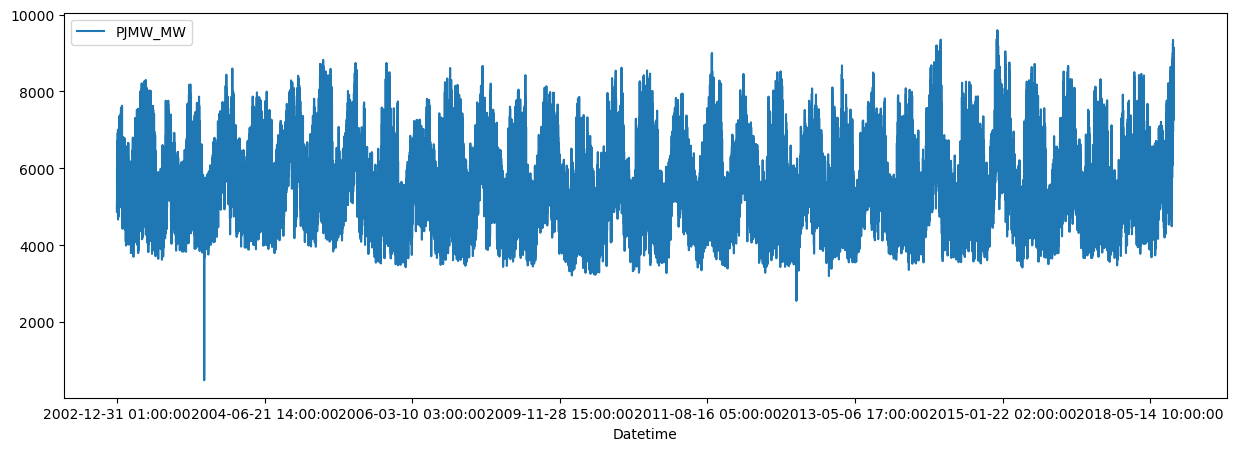

In [15]:
data.plot(style='-',figsize=(15,5))
plt.show()

In [17]:
data.index

Index(['2002-12-31 01:00:00', '2002-12-31 02:00:00', '2002-12-31 03:00:00',
       '2002-12-31 04:00:00', '2002-12-31 05:00:00', '2002-12-31 06:00:00',
       '2002-12-31 07:00:00', '2002-12-31 08:00:00', '2002-12-31 09:00:00',
       '2002-12-31 10:00:00',
       ...
       '2018-01-01 15:00:00', '2018-01-01 16:00:00', '2018-01-01 17:00:00',
       '2018-01-01 18:00:00', '2018-01-01 19:00:00', '2018-01-01 20:00:00',
       '2018-01-01 21:00:00', '2018-01-01 22:00:00', '2018-01-01 23:00:00',
       '2018-01-02 00:00:00'],
      dtype='object', name='Datetime', length=143206)

In [18]:
# convert to data time
data.index = pd.to_datetime(data.index)

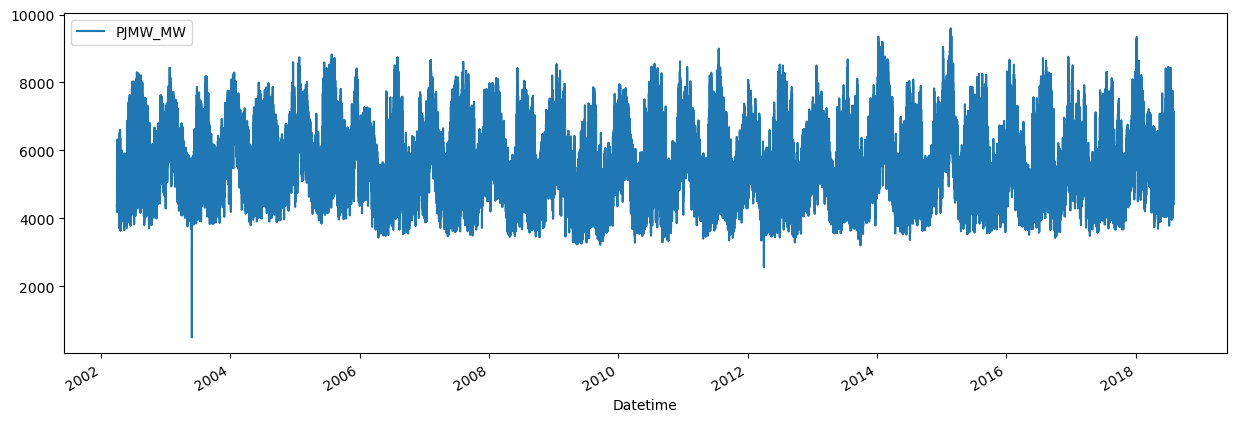

In [19]:
data.plot(style='-',figsize=(15,5))
plt.show()

# Train / Test Split

In [24]:
train = data.loc[data.index < pd.to_datetime('2015-01-01')]
test = data.loc[data.index > pd.to_datetime('2015-01-01')]

In [25]:
train.head()

,PJMW_MW
Datetime,
2002-12-31 01:00:00,5077.0
2002-12-31 02:00:00,4939.0
2002-12-31 03:00:00,4885.0
2002-12-31 04:00:00,4857.0
2002-12-31 05:00:00,4930.0


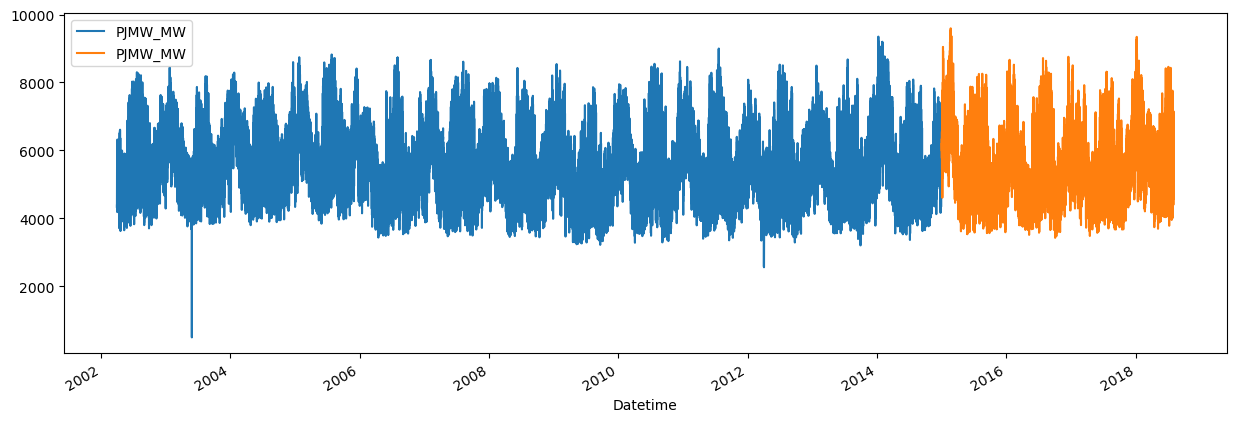

In [27]:
fig, ax = plt.subplots(figsize = (15,5))
train.plot(ax=ax, label="Train set")
test.plot(ax=ax, label="Test set")
plt.show()

<AxesSubplot:xlabel='Datetime'>

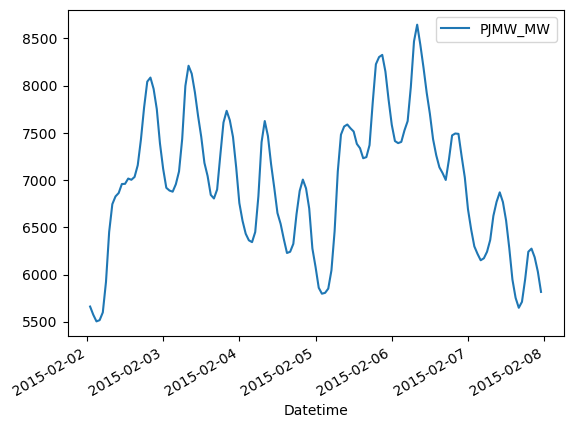

In [30]:
# one week
data.loc[(data.index > '02-02-2015') & (data.index < '02-08-2015')].plot()

In [35]:
data.loc['02-06-2015']

,PJMW_MW
Datetime,
2015-02-06 01:00:00,7413.0
2015-02-06 02:00:00,7391.0
2015-02-06 03:00:00,7404.0
2015-02-06 04:00:00,7526.0
2015-02-06 05:00:00,7624.0
2015-02-06 06:00:00,7985.0
2015-02-06 07:00:00,8468.0
2015-02-06 08:00:00,8645.0
2015-02-06 09:00:00,8431.0


## Feature Creation

In [37]:
data.index.hour

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            15, 16, 17, 18, 19, 20, 21, 22, 23,  0],
           dtype='int64', name='Datetime', length=143206)

In [38]:
data['hour'] = data.index.hour
data['dayofweek'] = data.index.day_of_week
data['quater'] = data.index.quarter
data['month'] = data.index.month
data['year'] = data.index.year
data['dayofyear'] = data.index.day_of_year

In [39]:
data.head()

,PJMW_MW,hour,dayofweek,quater,month,year,dayofyear
Datetime,,,,,,,
2002-12-31 01:00:00,5077.0,1,1,4,12,2002,365
2002-12-31 02:00:00,4939.0,2,1,4,12,2002,365
2002-12-31 03:00:00,4885.0,3,1,4,12,2002,365
2002-12-31 04:00:00,4857.0,4,1,4,12,2002,365
2002-12-31 05:00:00,4930.0,5,1,4,12,2002,365


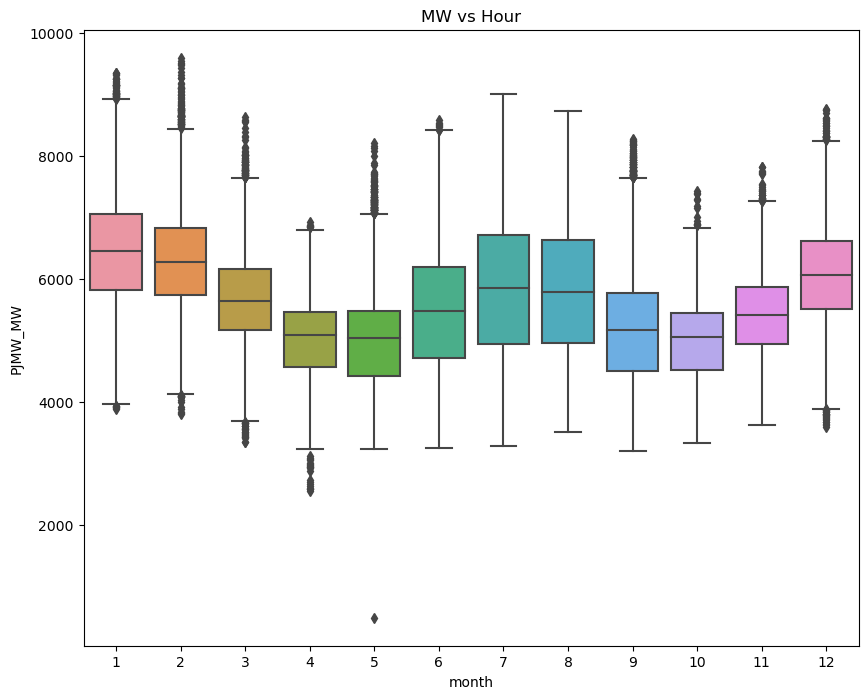

In [48]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=data, x = 'month', y='PJMW_MW')
ax.set_title('MW vs Hour')
plt.show()

## Create our model

In [46]:
# https://www.youtube.com/watch?v=vV12dGe_Fho
import xgboost as xgb 

ModuleNotFoundError: No module named 'xgboost'

In [47]:
!pip install xgboost

^C
